Kevin Estrada
    

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
#from sklearn.metrics import make_squared_error #(?)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [4]:
np.random.seed(1)
bias = 20*np.random.randn()


X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df
                                                          

,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026
...,...,...,...,...,...,...
295,-0.081570,1.529248,0.686483,1.717089,-0.804277,343.244347
296,0.300254,-0.429596,0.805913,-0.219552,-0.251852,20.913333
297,-1.326490,0.308204,1.115489,1.008196,-3.016032,-8.753043
298,-1.619646,2.005141,-0.187626,-0.148941,1.165335,182.614426


MSE: 1131.99
R²: 0.95
[44.166675   80.03255319 90.51428891 86.13498446 67.48800688]
32.68084820747812


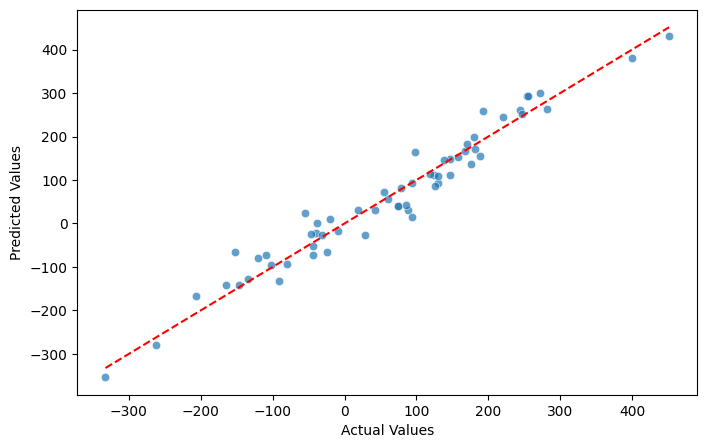

In [5]:
# Define Custom R² and MSE Calculations
calc_R2 = lambda y, y_hat: 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)
calc_MSE = lambda y, y_hat: np.mean((y - y_hat)**2)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R²
MSE = calc_MSE(y_test, y_pred)
R2 = calc_R2(y_test, y_pred)
print(f"MSE: {MSE:.2f}")
print(f"R²: {R2:.2f}")
print(model.coef_)
print(model.intercept_)


plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#### Your written answers here

What are your model parameters?
 - 

What were your MSE and R^2?
 - 



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [6]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


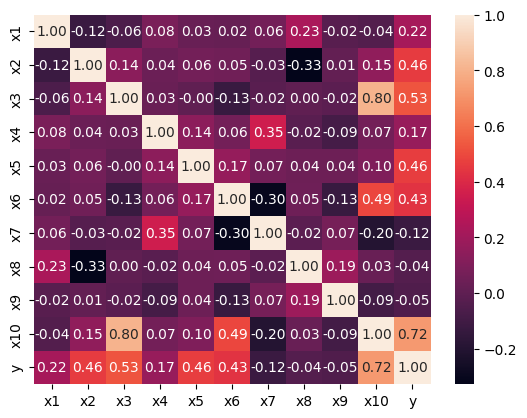

In [7]:
corr = reg2_df.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

In [8]:
candidate_idx = [0, 1, 2, 3, 4, 5, 6, 7]

Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]
Z_names
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)  

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

y_pred = model_LR.predict(Z_test)
mse = mean_squared_error(y_test, y_pred)

print(f'R2_train = {R2_train:.2f}')
print(f'R2_test = {R2_test:.2f}')
print(f'MSE = {mse:.2f}')

NameError: name 'mean_squared_error' is not defined

In [ ]:
print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit Model:
 y = -15.38 + 59.26*x1 + 75.73*x2 + 103.93*x3 + 13.53*x4 + 56.54*x5 + 74.19*x6 + -8.80*x7 + -1.80*x8


#### Your written answers here

What are your model parameters?
 - 

Which features (x1, x2...) were significant? Which were co-linear?
 - 
 
What were your MSE and R^2?
 - 



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [12]:
housing_df = pd.read_csv('kc_house_data.csv')
#ignore ID, Date, Zipcode
housing_df.columns

housing_df2 = housing_df.drop(columns=['id','date', 'zipcode'])
housing_df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


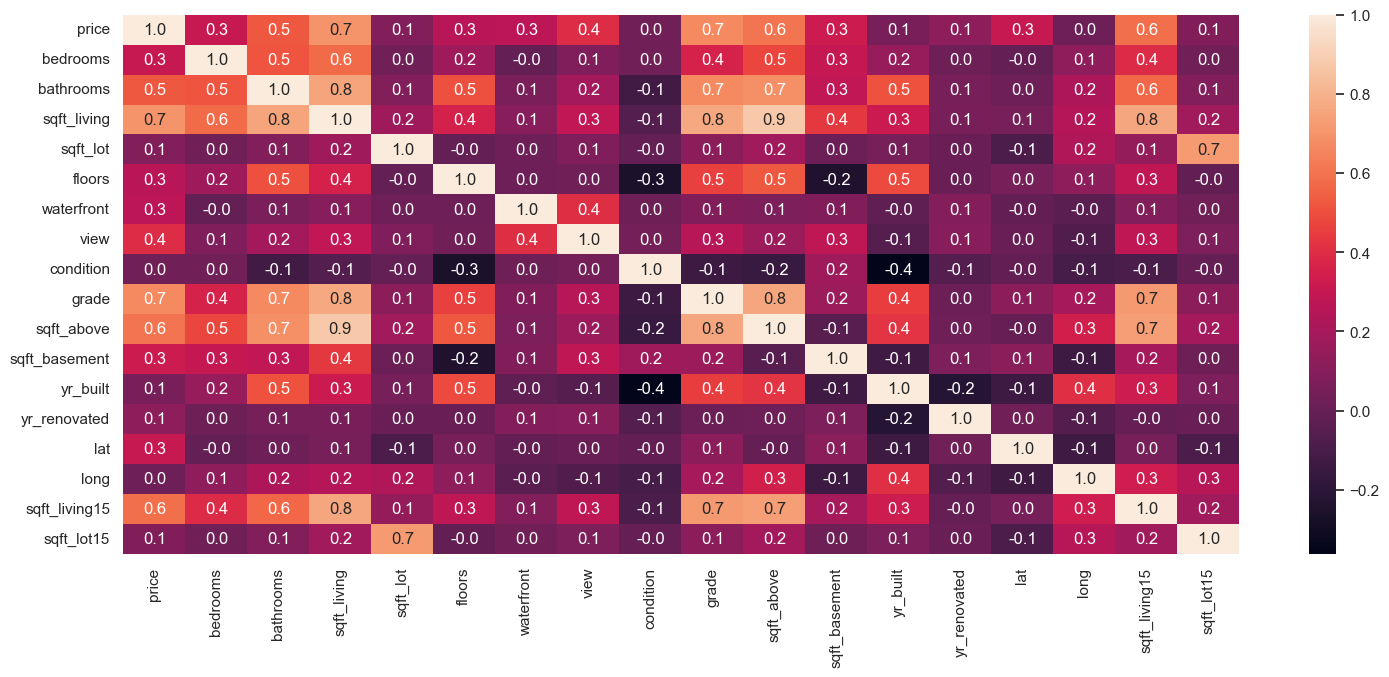

In [21]:
housing_df = pd.read_csv('kc_house_data.csv')

housing_df.drop(columns = ['id', 'date', 'zipcode'], inplace = True)
sns.set_theme(rc={'figure.figsize':(18,7)})
sns.heatmap(housing_df.corr(), annot = True, fmt = '.1f')
plt.show()

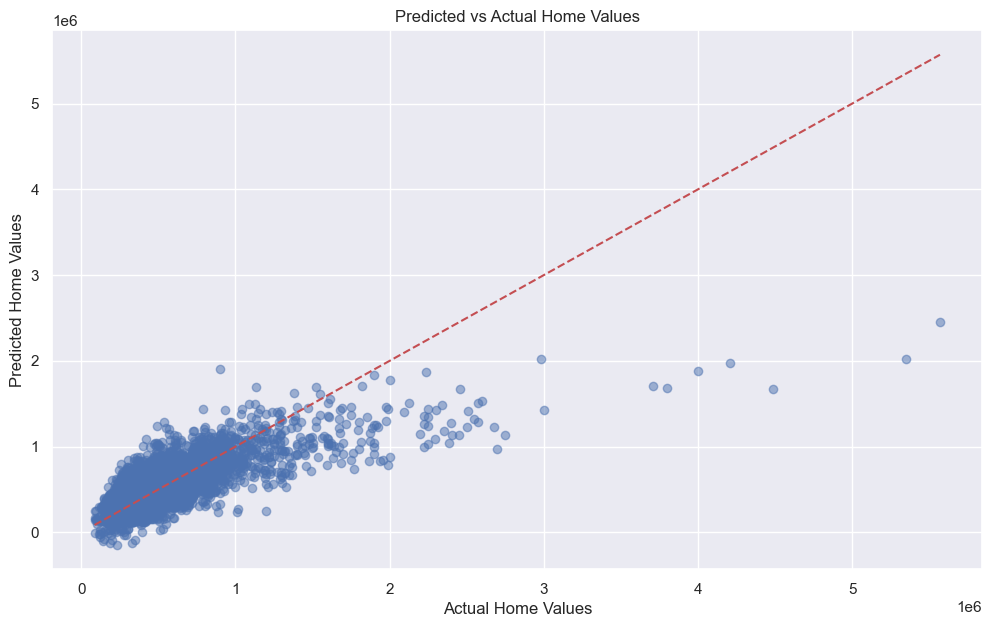

R2 = 0.55


In [22]:
from sklearn.preprocessing import StandardScaler
X = housing_df[['sqft_above', 'sqft_living', 'grade']]
y = housing_df2[['price']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test  = ss.transform(X_test)

model_LinReg = LinearRegression()
model_LinReg.fit(X_scaled_train, y_train)

plt.figure(figsize=(12, 7))
plt.scatter(y_test, model_LinReg.predict(X_scaled_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Predicted vs Actual Home Values')
plt.show()

print(f'R2 = {model_LinReg.score(X_scaled_test, y_test):.2f}')

#### Your written answers here
Which features are you using and why?
 
 - I decided to use sqft_above, sqft_living, and grade since it seemed to be the most relevant when looking at the heatmap.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [19]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

y = housing_df2['price']
X = housing_df2.drop(columns = ['price'])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# scale the data
ss = StandardScaler()
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.transform(X_test)

alpha = 30000
model_lasso = Lasso(alpha = alpha)
model_lasso.fit(X_scaled_train, y_train)

R2 = model_lasso.score(X_scaled_test, y_test)
print(f'R2 = {R2:.2f}')
for col, coef in zip(X.columns, model_lasso.coef_):
        print(f'{col}: {coef:.2f}')

print_model(model_lasso.intercept_, model_lasso.coef_, X.columns, 'Lasso Regression')

R2 = 0.66
bedrooms: -0.00
bathrooms: 0.00
sqft_living: 149383.35
sqft_lot: -0.00
floors: 0.00
waterfront: 36491.47
view: 35508.60
condition: 0.00
grade: 98178.00
sqft_above: 0.00
sqft_basement: 0.00
yr_built: -29375.69
yr_renovated: 0.00
lat: 60049.15
long: -0.00
sqft_living15: 0.00
sqft_lot15: -0.00
Lasso Regression:
 y = 540254.41 + 149383.35*sqft_living + 36491.47*waterfront + 35508.60*view + 98178.00*grade + -29375.69*yr_built + 60049.15*lat


### Your written answers here
Which regression did you use?
 - Lasso Regression
Does your regularized model look better than your MLR? How so?
 - Yes it does, it has a higher value than MLR by .1.
 

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [16]:
above1mil = housing_df2[housing_df2['price'] > 1000000]
below1mil = housing_df2[housing_df2['price'] <= 1000000]
below1mil

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


c:\Users\Kevin\miniconda3\envs\cs371\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


model coefficients: [ -17376.76491097   63248.39082328  201527.17394445   23325.31180169
  -66234.80622896  164258.02919203   22146.96991343   28446.0091546
   76487.53775048  132614.3609891        0.          -57505.55689428
   15968.59078619   40943.70970573 -159791.70140015   36660.65079615
  -39077.66898633], 1519504.1467576998
MSE_test = 265235318010.22, MSE_train = 171909277883.58
R2_test = 0.56, R2_train = 0.50


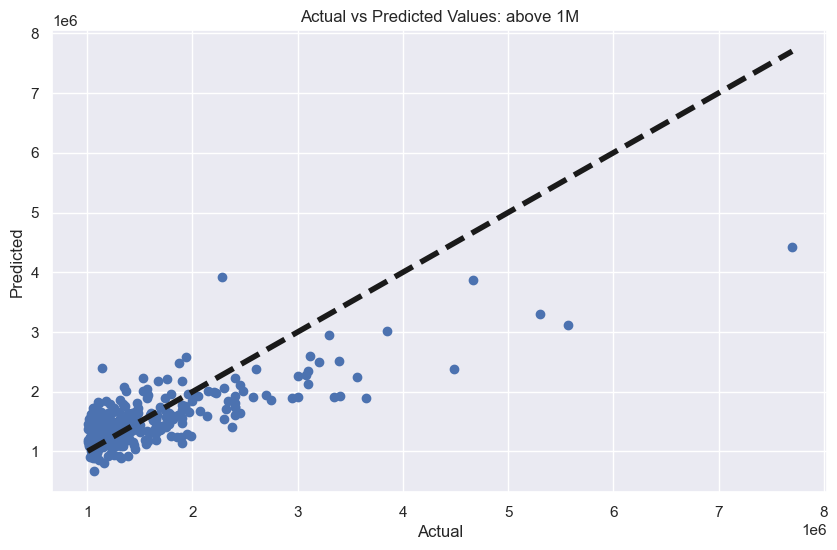

In [17]:
y = above1mil['price']
X = above1mil.drop(columns = ['price'])

alpha = 2000
model_lasso = Lasso(alpha = alpha)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

model_lasso.fit(X_scaled_train, y_train)

# Make predictions
y_pred_train = model_lasso.predict(X_scaled_train)
y_pred_test = model_lasso.predict(X_scaled_test)
y_pred = model_lasso.predict(X)

# Assess the model
MSE_train = sk.metrics.mean_squared_error(y_train, y_pred_train)
R2_train = model_lasso.score(X_scaled_train, y_train)

MSE_test = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test = model_lasso.score(X_scaled_test, y_test)

print(f'model coefficients: {model_lasso.coef_}, {model_lasso.intercept_}')
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')

# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values: above 1M')
plt.show()

c:\Users\Kevin\miniconda3\envs\cs371\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


model coefficients: [ -2322.87652956  12534.78269332  48242.90544065   4397.85936949
  14035.47646062   5198.96463141  15783.80452413  15378.16234938
  70026.56842177    322.07156681      0.         -43538.64969971
   3576.06993827  72746.7889538      -0.          28355.43111844
      0.        ], 467775.4788435302
MSE_test = 12351962826.95, MSE_train = 12042783030.69
R2_test = 0.68, R2_train = 0.69


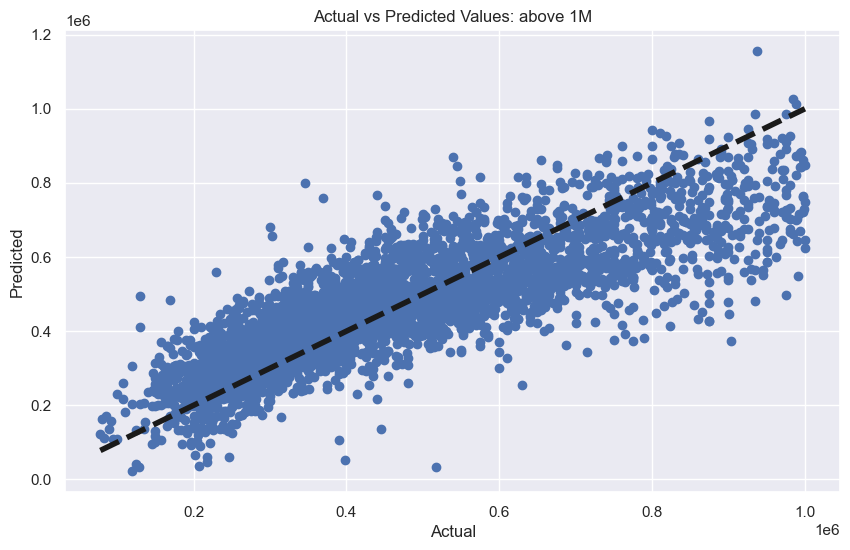

In [18]:
y = below1mil['price']
X = below1mil.drop(columns = ['price'])

alpha = 2000
model_lasso = Lasso(alpha = alpha)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

model_lasso.fit(X_scaled_train, y_train)

# Make predictions
y_pred_train = model_lasso.predict(X_scaled_train)
y_pred_test = model_lasso.predict(X_scaled_test)
y_pred = model_lasso.predict(X)

# Assess the model
MSE_train = sk.metrics.mean_squared_error(y_train, y_pred_train)
R2_train = model_lasso.score(X_scaled_train, y_train)

MSE_test = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test = model_lasso.score(X_scaled_test, y_test)

print(f'model coefficients: {model_lasso.coef_}, {model_lasso.intercept_}')
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')

# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values: above 1M')
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?

  - R2_test = 0.68, R2_train = 0.69
 
